In [1]:
# import
import gymnasium as gym
import copy
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager
import random

In [2]:
'''
Represents a Stochastic Maze problem Gym Environment which provides a Fully observable
MDP
'''
class StochasticMazeEnv(gym.Env):
    '''
    StochasticMazeEnv represents the Gym Environment for the Stochastic Maze environment
    States : [0,1,2,3,4,5,6,7,8,9,10,11]
    Actions : ["Left":0, "Up":1, "Right":2, "Down":3]
    '''
    metadata = {'render.modes': ['human']}

    def __init__(self,initial_state=0,no_states=12,no_actions=4):
        '''
        Constructor for the StochasticMazeEnv class

        Args:
            initial_state : starting state of the agent
            no_states : The no. of possible states which is 12
            no_actions : The no. of possible actions which is 4
            
        '''
        self.initial_state = initial_state
        self.state = self.initial_state
        self.nA = no_actions
        self.nS = no_states
        self.actions_dict = {"L":0, "U":1, "R":2, "D":3}
        self.prob_dynamics = {
            0: {
                0: [(0.8, 0, -0.01, False), (0.1, 0, -0.01, False), (0.1, 4, -0.01, False)],
                1: [(0.8, 0, -0.01, False), (0.1, 0, -0.01, False), (0.1, 1, -0.01, False)],
                2: [(0.8, 1, -0.01, False), (0.1, 0, -0.01, False), (0.1, 4, -0.01, False)],
                3: [(0.8, 4, -0.01, False), (0.1, 0, -0.01, False), (0.1, 1, -0.01, False)],
            },
            1: {
                0: [(0.8, 0, -0.01, False), (0.1, 1, -0.01, False), (0.1, 1, -0.01, False)],
                1: [(0.8, 1, -0.01, False), (0.1, 0, -0.01, False), (0.1, 2, -0.01, False)],
                2: [(0.8, 2, -0.01, False), (0.1, 1, -0.01, False), (0.1, 1, -0.01, False)],
                3: [(0.8, 1, -0.01, False), (0.1, 0, -0.01, False), (0.1, 2, -0.01, False)],
            },
            2: {
                0: [(0.8, 1, -0.01, False), (0.1, 2, -0.01, False), (0.1, 6, -0.01, False)],
                1: [(0.8, 2, -0.01, False), (0.1, 1, -0.01, False), (0.1, 3, +1, True)],
                2: [(0.8, 3, +1, True), (0.1, 2, -0.01, False), (0.1, 6, -0.01, False)],
                3: [(0.8, 6, -0.01, False), (0.1, 1, -0.01, False), (0.1, 3, +1, True)],
            },
            3: {
                0: [(0.8, 3, 0, True), (0.1, 3, 0, True), (0.1, 3, 0, True)],
                1: [(0.8, 3, 0, True), (0.1, 3, 0, True), (0.1, 3, 0, True)],
                2: [(0.8, 3, 0, True), (0.1, 3, 0, True), (0.1, 3, 0, True)],
                3: [(0.8, 3, 0, True), (0.1, 3, 0, True), (0.1, 3, 0, True)],
            },
            4: {
                0: [(0.8, 4, -0.01, False), (0.1, 0, -0.01, False), (0.1, 8, -0.01, False)],
                1: [(0.8, 0, -0.01, False), (0.1, 4, -0.01, False), (0.1, 4, -0.01, False)],
                2: [(0.8, 4, -0.01, False), (0.1, 0, -0.01, False), (0.1, 8, -0.01, False)],
                3: [(0.8, 8, -0.01, False), (0.1, 4, -0.01, False), (0.1, 4, -0.01, False)],
            },
            6: {
                0: [(0.8, 6, -0.01, False), (0.1, 2, -0.01, False), (0.1, 10, -0.01, False)],
                1: [(0.8, 2, -0.01, False), (0.1, 6, -0.01, False), (0.1, 7, -1, True)],
                2: [(0.8, 7, -1, True), (0.1, 2, -0.01, False), (0.1, 10, -0.01, False)],
                3: [(0.8, 10, -0.01, False), (0.1, 6, -0.01, False), (0.1, 7, -1, True)],
            },
            7: {
                0: [(0.8, 7, 0, True), (0.1, 7, 0, True), (0.1, 7, 0, True)],
                1: [(0.8, 7, 0, True), (0.1, 7, 0, True), (0.1, 7, 0, True)],
                2: [(0.8, 7, 0, True), (0.1, 7, 0, True), (0.1, 7, 0, True)],
                3: [(0.8, 7, 0, True), (0.1, 7, 0, True), (0.1, 7, 0, True)],
            },
            8: {
                0: [(0.8, 8, -0.01, False), (0.1, 8, -0.01, False), (0.1, 4, -0.01, False)],
                1: [(0.8, 4, -0.01, False), (0.1, 8, -0.01, False), (0.1, 9, -0.01, False)],
                2: [(0.8, 9, -0.01, False), (0.1, 8, -0.01, False), (0.1, 4, -0.01, False)],
                3: [(0.8, 8, -0.01, False), (0.1, 8, -0.01, False), (0.1, 9, -0.01, False)],
            },
            9: {
                0: [(0.8, 8, -0.01, False), (0.1, 9, -0.01, False), (0.1, 9, -0.01, False)],
                1: [(0.8, 9, -0.01, False), (0.1, 8, -0.01, False), (0.1, 10, -0.01, False)],
                2: [(0.8, 10, -0.01, False), (0.1, 9, -0.01, False), (0.1, 9, -0.01, False)],
                3: [(0.8, 9, -0.01, False), (0.1, 8, -0.01, False), (0.1, 10, -0.01, False)]
            },
            10: {
                0: [(0.8, 9, -0.01, False), (0.1, 6, -0.01, False), (0.1, 10, -0.01, False)],
                1: [(0.8, 6, -0.01, False), (0.1, 9, -0.01, False), (0.1, 11, -0.01, False)],
                2: [(0.8, 11, -0.01, False), (0.1, 6, -0.01, False), (0.1, 10, -0.01, False)],
                3: [(0.8, 10, -0.01, False), (0.1, 9, -0.01, False), (0.1, 11, -0.01, False)]
            },
            11: {
                0: [(0.8, 10, -0.01, False), (0.1, 7, -1, True), (0.1, 11, -0.01, False)],
                1: [(0.8, 7, -1, True), (0.1, 10, -0.01, False), (0.1, 11, -0.01, False)],
                2: [(0.8, 11, -0.01, False), (0.1, 7, -1, True), (0.1, 11, -0.01, False)],
                3: [(0.8, 11, -0.01, False), (0.1, 11, -0.01, False), (0.1, 10, -0.01, False)]
            }
        }
        self.reset()

    def reset(self):
        '''
        Resets the environment
        Returns:
            observations containing player's current state
        '''
        self.state = self.initial_state
        return self.get_obs()

    def get_obs(self):
        '''
        Returns the player's state as the observation of the environment
        '''
        return (self.state)

    def render(self, mode='human'):
        '''
        Renders the environment
        '''
        print("Current state: {}".format(self.state))

    def sample_action(self):
        '''
        Samples and returns a random action from the action space
        '''
        return random.randint(0, self.nA)
    def P(self):
        '''
        Defines and returns the probabilty transition matrix which is in the form of a nested dictionary
        '''
        self.prob_dynamics = {
            0: {
                0: [(0.8, 0, -0.01, False), (0.1, 0, -0.01, False), (0.1, 4, -0.01, False)],
                1: [(0.8, 0, -0.01, False), (0.1, 0, -0.01, False), (0.1, 1, -0.01, False)],
                2: [(0.8, 1, -0.01, False), (0.1, 0, -0.01, False), (0.1, 4, -0.01, False)],
                3: [(0.8, 4, -0.01, False), (0.1, 0, -0.01, False), (0.1, 1, -0.01, False)],
            },
            1: {
                0: [(0.8, 0, -0.01, False), (0.1, 1, -0.01, False), (0.1, 1, -0.01, False)],
                1: [(0.8, 1, -0.01, False), (0.1, 0, -0.01, False), (0.1, 2, -0.01, False)],
                2: [(0.8, 2, -0.01, False), (0.1, 1, -0.01, False), (0.1, 1, -0.01, False)],
                3: [(0.8, 1, -0.01, False), (0.1, 0, -0.01, False), (0.1, 2, -0.01, False)],
            },
            2: {
                0: [(0.8, 1, -0.01, False), (0.1, 2, -0.01, False), (0.1, 6, -0.01, False)],
                1: [(0.8, 2, -0.01, False), (0.1, 1, -0.01, False), (0.1, 3, +1, True)],
                2: [(0.8, 3, +1, True), (0.1, 2, -0.01, False), (0.1, 6, -0.01, False)],
                3: [(0.8, 6, -0.01, False), (0.1, 1, -0.01, False), (0.1, 3, +1, True)],
            },
            3: {
                0: [(0.8, 3, 0, True), (0.1, 3, 0, True), (0.1, 3, 0, True)],
                1: [(0.8, 3, 0, True), (0.1, 3, 0, True), (0.1, 3, 0, True)],
                2: [(0.8, 3, 0, True), (0.1, 3, 0, True), (0.1, 3, 0, True)],
                3: [(0.8, 3, 0, True), (0.1, 3, 0, True), (0.1, 3, 0, True)],
            },
            4: {
                0: [(0.8, 4, -0.01, False), (0.1, 0, -0.01, False), (0.1, 8, -0.01, False)],
                1: [(0.8, 0, -0.01, False), (0.1, 4, -0.01, False), (0.1, 4, -0.01, False)],
                2: [(0.8, 4, -0.01, False), (0.1, 0, -0.01, False), (0.1, 8, -0.01, False)],
                3: [(0.8, 8, -0.01, False), (0.1, 4, -0.01, False), (0.1, 4, -0.01, False)],
            },
            6: {
                0: [(0.8, 6, -0.01, False), (0.1, 2, -0.01, False), (0.1, 10, -0.01, False)],
                1: [(0.8, 2, -0.01, False), (0.1, 6, -0.01, False), (0.1, 7, -1, True)],
                2: [(0.8, 7, -1, True), (0.1, 2, -0.01, False), (0.1, 10, -0.01, False)],
                3: [(0.8, 10, -0.01, False), (0.1, 6, -0.01, False), (0.1, 7, -1, True)],
            },
            7: {
                0: [(0.8, 7, 0, True), (0.1, 7, 0, True), (0.1, 7, 0, True)],
                1: [(0.8, 7, 0, True), (0.1, 7, 0, True), (0.1, 7, 0, True)],
                2: [(0.8, 7, 0, True), (0.1, 7, 0, True), (0.1, 7, 0, True)],
                3: [(0.8, 7, 0, True), (0.1, 7, 0, True), (0.1, 7, 0, True)],
            },
            8: {
                0: [(0.8, 8, -0.01, False), (0.1, 8, -0.01, False), (0.1, 4, -0.01, False)],
                1: [(0.8, 4, -0.01, False), (0.1, 8, -0.01, False), (0.1, 9, -0.01, False)],
                2: [(0.8, 9, -0.01, False), (0.1, 8, -0.01, False), (0.1, 4, -0.01, False)],
                3: [(0.8, 8, -0.01, False), (0.1, 8, -0.01, False), (0.1, 9, -0.01, False)],
            },
            9: {
                0: [(0.8, 8, -0.01, False), (0.1, 9, -0.01, False), (0.1, 9, -0.01, False)],
                1: [(0.8, 9, -0.01, False), (0.1, 8, -0.01, False), (0.1, 10, -0.01, False)],
                2: [(0.8, 10, -0.01, False), (0.1, 9, -0.01, False), (0.1, 9, -0.01, False)],
                3: [(0.8, 9, -0.01, False), (0.1, 8, -0.01, False), (0.1, 10, -0.01, False)]
            },
            10: {
                0: [(0.8, 9, -0.01, False), (0.1, 6, -0.01, False), (0.1, 10, -0.01, False)],
                1: [(0.8, 6, -0.01, False), (0.1, 9, -0.01, False), (0.1, 11, -0.01, False)],
                2: [(0.8, 11, -0.01, False), (0.1, 6, -0.01, False), (0.1, 10, -0.01, False)],
                3: [(0.8, 10, -0.01, False), (0.1, 9, -0.01, False), (0.1, 11, -0.01, False)]
            },
            11: {
                0: [(0.8, 10, -0.01, False), (0.1, 7, -1, True), (0.1, 11, -0.01, False)],
                1: [(0.8, 7, -1, True), (0.1, 10, -0.01, False), (0.1, 11, -0.01, False)],
                2: [(0.8, 11, -0.01, False), (0.1, 7, -1, True), (0.1, 11, -0.01, False)],
                3: [(0.8, 11, -0.01, False), (0.1, 11, -0.01, False), (0.1, 10, -0.01, False)]
            }
        }
        return self.prob_dynamics


    def step(self, action):
        '''
        Performs the given action
        Args:
            action : action from the action_space to be taking in the environment
        Returns:
            observation - returns current state
            reward - reward obtained after taking the given action
            done - True if the episode is complete else False
        '''
        if action >= self.nA:
            action = self.nA-1

        index = np.random.choice(3,1,p=[0.8,0.1,0.1])[0]

        dynamics_tuple = self.prob_dynamics[self.state][action][index]
        self.state = dynamics_tuple[1]
        

        return self.state, dynamics_tuple[2], dynamics_tuple[3]

## Q1. Find an optimal policy to navigate the given environment using Policy Iteration 

In [3]:
import numpy as np

class PolicyIteration:
    def __init__(self, env, gamma=0.95, theta=1e-3):
        # Initialize PolicyIteration with the environment, discount factor (gamma), and convergence threshold (theta)
        self.env = env
        self.gamma = gamma
        self.theta = theta
        # Initialize policy with a uniform distribution and state values with zeros
        self.policy = np.ones([env.nS, env.nA]) / env.nA  
        self.values = np.zeros(env.nS)

    def evaluate_policy(self):
        # Iteratively evaluate the current policy until convergence
        while True:
            delta = 0  # Initialize the change in state values
            # Loop through all states in the environment
            for s in range(self.env.nS):
                v = self.values[s]  # Store the current state value
                new_v = 0  # Initialize the new state value
                # Check if the state has defined probability dynamics
                if s in self.env.prob_dynamics:
                    # Loop through all possible actions
                    for a in range(self.env.nA):
                        # Check if the action has defined probability dynamics for the current state
                        if a in self.env.prob_dynamics[s]:
                            transitions = self.env.prob_dynamics[s][a]
                            # Calculate the action value using the Bellman equation
                            action_value = sum(p * (r + self.gamma * self.values[next_s]) for p, next_s, r, _ in transitions)
                            new_v += self.policy[s, a] * action_value
                # Update the state value and compute the change
                self.values[s] = new_v
                delta = max(delta, np.abs(v - new_v))
            # Check for convergence
            if delta < self.theta:
                break

    def improve_policy(self):
        # Improve the policy based on the current state values
        policy_stable = True  # Assume policy stability
        # Loop through all states in the environment
        for s in range(self.env.nS):
            if s in self.env.prob_dynamics:
                old_action = np.argmax(self.policy[s])  # Store the current best action
                # Calculate action values for each action with defined dynamics
                action_values = [sum(p * (r + self.gamma * self.values[next_s]) for p, next_s, r, _ in self.env.prob_dynamics[s][a])
                                for a in range(self.env.nA) if a in self.env.prob_dynamics[s]]
                # Check if there are valid action values
                if action_values:
                    best_action = np.argmax(action_values)  # Find the new best action
                    self.policy[s] = np.eye(self.env.nA)[best_action]  # Update the policy
                    # Check if the best action has changed
                    if old_action != best_action:
                        policy_stable = False  # Policy is not stable

        return policy_stable

    def policy_iteration(self):
        # Perform policy iteration until convergence
        num_iterations = 0  # Initialize the number of iterations
        while True:
            self.evaluate_policy()
            policy_stable = self.improve_policy()
            num_iterations += 1  # Increment the iteration count
            if policy_stable:
                break

        return self.values, num_iterations  # Return state values along with optimal policy and iteration count

    def get_optimal_policy(self):
        # Return the optimal policy by selecting the action with the highest probability for each state
        return np.argmax(self.policy, axis=1)


In [4]:
# Example usage
env = StochasticMazeEnv()
policy_iteration = PolicyIteration(env)
state_values_PI, num_iterations_PI = policy_iteration.policy_iteration()
optimal_policy_PI = policy_iteration.get_optimal_policy()
print("Optimal Policy from PI:", optimal_policy_PI)
print("Optimal State Values from PI Algo:" , state_values_PI)
print("Number of Iterations in PI:", num_iterations_PI)

Optimal Policy from PI: [2 2 2 0 1 0 1 0 1 0 1 0]
Optimal State Values from PI Algo: [0.80788033 0.88196632 0.95314833 0.         0.74566422 0.
 0.67999197 0.         0.68090594 0.62652197 0.60293811 0.3858576 ]
Number of Iterations in PI: 3


## Q2. Find an optimal policy to navigate the given environment using Value Iteration

In [5]:
import numpy as np

class ValueIteration:
    def __init__(self, env, gamma=0.95, theta=1e-3):
        # Initialize ValueIteration with the environment, discount factor (gamma), and convergence threshold (theta)
        self.env = env
        self.gamma = gamma
        self.theta = theta
        self.values = np.zeros(env.nS)

    def value_iteration(self):
        num_iterations = 0  # Initialize the number of iterations
        while True:
            delta = 0  # Initialize the change in state values
            # Loop through all states in the environment
            for s in range(self.env.nS):
                v = self.values[s]  # Store the current state value
                # Check if the state has defined probability dynamics
                if s in self.env.prob_dynamics:
                    # Calculate action values for each action with defined dynamics
                    action_values = [
                        sum(p * (r + self.gamma * self.values[next_s]) for p, next_s, r, _ in self.env.prob_dynamics[s].get(a, []))
                        for a in range(self.env.nA)
                    ]
                    # Check if there are valid action values
                    if action_values:
                        new_v = max(action_values)  # Update the state value with the maximum action value
                        self.values[s] = new_v
                        delta = max(delta, np.abs(v - new_v))  # Update the change

            num_iterations += 1  # Increment the iteration count
            if delta < self.theta:  # Check for convergence
                break

        return self.values, num_iterations

    def get_optimal_policy(self):
        optimal_policy = np.zeros(self.env.nS, dtype=int)
        # Loop through all states in the environment
        for s in range(self.env.nS):
            # Check if the state has defined probability dynamics
            if s in self.env.prob_dynamics:
                # Calculate action values for each action with defined dynamics
                action_values = [
                    sum(p * (r + self.gamma * self.values[next_s]) for p, next_s, r, _ in self.env.prob_dynamics[s].get(a, []))
                    for a in range(self.env.nA)
                ]
                # Check if there are valid action values
                if action_values:
                    optimal_policy[s] = np.argmax(action_values)  # Select the action with the maximum value

        return optimal_policy



In [6]:
# Example Usage
env = StochasticMazeEnv()
value_iteration = ValueIteration(env)
optimal_values_VI, num_iterations_VI = value_iteration.value_iteration()
optimal_policy_VI = value_iteration.get_optimal_policy()
print("Optimal Policy From VI Algo:", optimal_policy_VI)
print("Optimal State Values From VI Algo:", optimal_values_VI)
print("Number of Iterations in VI:", num_iterations_VI)

Optimal Policy From VI Algo: [2 2 2 0 1 0 1 0 1 0 1 0]
Optimal State Values From VI Algo: [0.80784126 0.88196551 0.95314829 0.         0.74558643 0.
 0.67999191 0.         0.68069713 0.62617969 0.6029314  0.38587833]
Number of Iterations in VI: 11


## Q3. Compare PI and VI in terms of convergence. Is the policy obtained by both same?

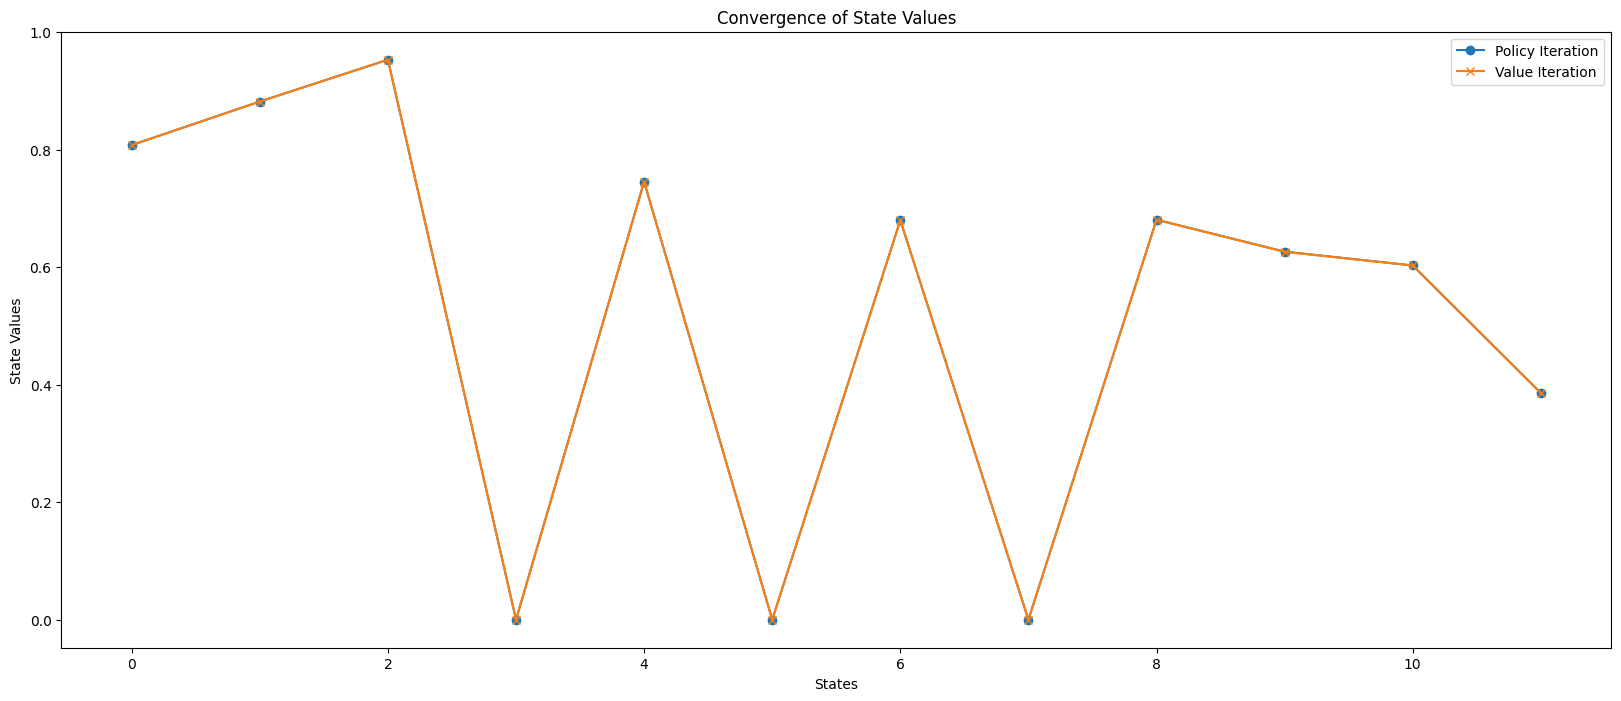

Optimal Policy Comparison:
Policy Iteration: [2 2 2 0 1 0 1 0 1 0 1 0]
Value Iteration: [2 2 2 0 1 0 1 0 1 0 1 0]
Policy Iteration Iterations: 3
Value Iteration Iterations: 11
Optimal Policies Match: True
Both algorithms converged to the same optimal policy.


In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Plotting State Values Convergence
plt.figure(figsize=(20, 8))
plt.plot(state_values_PI, label='Policy Iteration', marker='o')
plt.plot(optimal_values_VI, label='Value Iteration', marker='x')
plt.xlabel('States')
plt.ylabel('State Values')
plt.title('Convergence of State Values')
plt.legend()
plt.show()

# Comparing Optimal Policies
print("Optimal Policy Comparison:")
print("Policy Iteration:", optimal_policy_PI)
print("Value Iteration:", optimal_policy_VI)

# Print the number of iterations
print("Policy Iteration Iterations:",num_iterations_PI)
print("Value Iteration Iterations:", num_iterations_VI)

# Check if the optimal policies are the same
policy_match = np.array_equal(optimal_policy_PI, optimal_policy_VI)
print("Optimal Policies Match:", policy_match)


# Analysis Summary
if policy_match:
    print("Both algorithms converged to the same optimal policy.")
else:
    print("Optimal policies differ between Policy Iteration and Value Iteration.")


## Conclusion

In the comparative analysis of Policy Iteration (PI) and Value Iteration (VI) on the given Stochastic Maze Environment, several observations can be made:

1. **Optimal Policies:** Both PI and VI algorithms converged to the same optimal policy, which is represented as `[2 2 2 0 1 0 1 0 1 0 1 0]` for the twelve states.

2. **Number of Iterations:** Policy Iteration exhibited faster convergence in terms of the number of iterations compared to Value Iteration. PI required only 3 iterations, while VI needed 11 iterations to reach convergence.

3. **Algorithm Dynamics:** The difference in iteration counts can be attributed to the inherent characteristics of each algorithm. Policy Iteration alternates between policy evaluation and improvement, directly incorporating the optimal policy into its updates. In contrast, Value Iteration focuses on refining state values before deriving the optimal policy, leading to a higher number of iterations.

4. **Problem-Specific Factors:** The environment and initial conditions significantly influence the performance of the algorithms. The observed faster convergence of PI might be due to specific characteristics of the Stochastic Maze Environment.

In summary, both algorithms successfully obtained the same optimal policy, with Policy Iteration demonstrating quicker convergence in this particular scenario.
